In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f = lambda x: np.sin(2*x) + a*np.sin(4*x)
fprime = lambda x: 2* np.cos(2*x) + 4*a*np.cos(4*x)

In [3]:
x = np.linspace(0, np.pi, 100)
x0 = 0.75
a = 0.501
# a = 0.499

# Learning rate
etas = [0.1, 0.01, 0.001]

targetErr = 1e-8

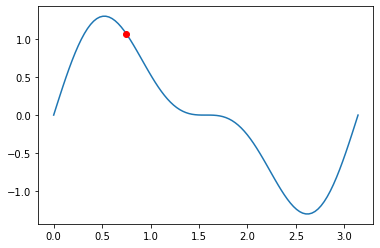

In [4]:
plt.plot(x, f(x))
plt.plot(x0, f(x0), 'ro')

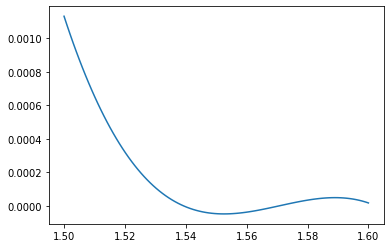

In [5]:
# A zoom in around the flat region
x = np.linspace(1.5, 1.6, 100)
plt.plot(x, f(x))

In [6]:
# optimizers

def SGD(x0, gradf):
  x0 = x0 - eta*gradf(x0)
  return x0

def MomentumSGD(x0, m, gradf, beta=0.9, nesterov=0):
  m = beta*m - eta*gradf(x0 + beta*m)
  x0 = x0 + m
  return x0, m

def AdaGrad(x0, gradf, s):
  s = s + gradf(x0)**2
  x0 = x0 - eta*gradf(x0)/np.sqrt(s + 1e-5)
  return x0, s

def RMSProp(x0, gradf, s, beta=0.9):
  s = beta*s + (1-beta)*gradf(x0)**2
  x0 = x0 - eta*gradf(x0)/np.sqrt(s + 1e-5)
  return x0, s

def Adam(x0, gradf, t, m, s, beta1=0.9, beta2=0.999):
  t+=1
  m = beta1*m + (1-beta1)*gradf(x0)
  s = beta2*s + (1-beta2)*gradf(x0)**2
  mh = m/(1-beta1**t)
  sh = s/(1-beta2**t)
  x0 = x0 - eta*mh/np.sqrt(sh+1e-5)
  return x0, t, m, s



In [7]:

# loop through the list of eta values
for eta in etas:
    # perform optimization using SGD with current eta value
    currErr = 1
    steps = 0
    x0 = 0.75
    while currErr > targetErr:
      x1 = SGD(x0, fprime)
      currErr = np.abs(x1-x0)
      x0 = x1
      steps += 1
    print(f'Minimum found x = {x0} with learning rate = {eta} in {steps} steps.')
    


Minimum found x = 1.5525579382404713 with learning rate = 0.1 in 267 steps.
Minimum found x = 1.5525558823376713 with learning rate = 0.01 in 2208 steps.
Minimum found x = 1.5525353687645167 with learning rate = 0.001 in 16885 steps.


In [8]:

# loop through the list of etas
for eta in etas:
  steps = 0
  currentErr = 1
  x0 = 0.75
  m = 0.0
  while currentErr>targetErr:
    x1, m = MomentumSGD(x0, m, fprime)
    currentErr = np.abs(x1-x0)
    x0=x1
    steps+=1
  print(f'Minimum found x = {x0} with learning rate = {eta} in {steps} steps.')



Minimum found x = 2.618186051246279 with learning rate = 0.1 in 18 steps.
Minimum found x = 2.618185809074192 with learning rate = 0.01 in 154 steps.
Minimum found x = 1.5525559655871317 with learning rate = 0.001 in 2064 steps.


In [9]:
for eta in etas:
  steps = 0
  currentErr = 1
  x0 = 0.75
  s= 0.0
  while currentErr>targetErr:
    x1 , s = AdaGrad(x0, fprime, s)
    currentErr = np.abs(x1-x0)
    x0 = x1
    steps+=1
  print(f'Minimum found x = {x0} with learning rate = {eta} in {steps} steps.')



Minimum found x = 1.552556649121219 with learning rate = 0.1 in 1516 steps.
Minimum found x = 1.5524336354614265 with learning rate = 0.01 in 70558 steps.
Minimum found x = 1.5428949357407409 with learning rate = 0.001 in 1862725 steps.


In [10]:
for eta in etas:
  steps = 0
  currentErr = 1
  x0 = 0.75
  s= 0.0
  while currentErr>targetErr:
    x1, s = RMSProp(x0, fprime, s)
    currentErr = np.abs(x1-x0)
    x0 = x1
    steps+=1
  print(f'Minimum found x = {x0} with learning rate = {eta} in {steps} steps.')




Minimum found x = 1.552558148148238 with learning rate = 0.1 in 52 steps.
Minimum found x = 1.5525581462142601 with learning rate = 0.01 in 161 steps.
Minimum found x = 1.5525580948183633 with learning rate = 0.001 in 934 steps.


In [11]:
for eta in etas:
  # initializations
  steps = 0
  currentErr = 1
  x0 = 0.75
  m = 0.0
  s = 0.0
  t = 0
  while currentErr>targetErr:
    x1, t, m, s = Adam(x0, fprime, t, m, s)
    currentErr = np.abs(x1-x0)
    x0 = x1
    steps+=1
  print(f'Minimum found x = {x0} with learning rate = {eta} in {steps} steps.')

Minimum found x = 2.6181862432967242 with learning rate = 0.1 in 300 steps.
Minimum found x = 1.552557567799466 with learning rate = 0.01 in 1160 steps.
Minimum found x = 1.552556331618927 with learning rate = 0.001 in 5991 steps.
